In [93]:
__author__ = 'fengchen'

from cvxopt import matrix, solvers, spmatrix, sparse
import numpy as np
import matplotlib.pyplot as plt
from math import *

def calc_Q_p_G_h(data):
#     Q = spmatrix(2.0, range(3), range(3))
    Q = matrix([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], (3,3))
    Q[0,0] = 2
    Q[1,1] = 2
    p = matrix([0.0, 0.0, 0.0], (3,1))
    G = []
    h = []
    for items in data:
        row = []
        if items[2] == 1:
            row.extend([-1 * item for item in items[:2]])
            row.append(-1)
            G.append(row)
            h.append(-1.0)
        else:
            row.extend(items[:2])
            row.append(1)
            G.append(row)
            h.append(-1.0)
    #print G
    G = matrix(G).trans()
    h = matrix(h)
  
    return Q, p, G, h
def calc_Q_p_G_h_2(data,C):
    Q = spmatrix([], [], [], (8,8))
    Q[0,0] = 2
    Q[1,1] = 2
    p= matrix([0.0,0.0,0.0,C,C,C,C,C],(8,1))
    G = []
    h = []
    for items in data:
        row = []
        if items[2] == 1:
            row.extend([-1 * item for item in items[:2]])
            row.append(-1)
            G.append(row)
            h.append(-1.0)
        else:
            row.extend(items[:2])
            row.append(1)
            G.append(row)
            h.append(-1.0)

    G = matrix(G).trans()

    G_r = spmatrix(-1.,range(5),range(5))
    G_d = spmatrix([],[],[],(5,3))

    G=(sparse([[G,G_d],[G_r,G_r]]))
    h_d =  spmatrix([],[],[],(5,1))
    h = sparse([matrix(h),h_d])
  
    return Q, p, G, h    
    
def plot(data, w1, w2, b, sol):
    ### suppose you have obtained sol['x'] from CVXOPT QP minimization

    x = [item[0] for item in data if item[2] == 1]
    y = [item[1] for item in data if item[2] == 1]
    plt.scatter(x, y, s=80, facecolors='none', edgecolors='r')
    x = [item[0] for item in data if item[2] == -1]
    y = [item[1] for item in data if item[2] == -1]
    plt.scatter(x, y, s=80, facecolors='none', edgecolors='b')
    x = [item[0] for item in data]
    y = [item[1] for item in data]
    plt.scatter(x, y, s=40, facecolors='none', edgecolors='k')
    w1 = sol['x'][0]
    w2 = sol['x'][1]
    b  = sol['x'][2]

    print('w.x + b > 0 for positive class')
    print('w.x + b < 0 for negative class') 
    w = sol['x']
    print(f'x is --> {w}')
    x = [-2, 10]

    y = [(w1 * x[i] + b)/(-1 * w2) for i in range(2)]

    
    plt.plot(x, y, color='red')

    y = [(w1 * x[i] + b - 1)/(-1 * w2) for i in range(2)]

    plt.plot(x, y, color='black')

    y = [(w1 * x[i] + b + 1)/(-1 * w2) for i in range(2)]

    plt.plot(x, y, color='black')
    
    plt.gca().set_aspect('equal', adjustable='box')

    plt.grid()

    plt.gcf().set_size_inches(5, 10)

    plt.show()

    


def svm_proc(data):
    Q, p, G, h = calc_Q_p_G_h(data)
    print(f'Q is --> {Q} \n p is --> {p}\n G is --> {G} \n --> h is --> {h}')
    sol=solvers.qp(Q, p, G, h)
  
    w1 = sol['x'][0]
    w2 = sol['x'][1]
    b  = sol['x'][2]
    print(f'\n  w is -->{[w1,w2]} \n b is {b}')
    dot_product = np.dot([w1,w2],[w1,w2])
    x = [[item[0],item[1]] for item in data]
    w = [w1,w2]
    support_vectors = ['%.2f'%(np.dot(w,item)+b) for item in x]
    margin_size = 2 / (sqrt(dot_product))
    print(f'\n margin size is --> {margin_size}')
    print(f'\n ---------------------\n support vectors is --> {support_vectors} \n map with current data --> {data}')
    print('such that w.x+b = 1 or -1 \n -----------------------')
    plot(data, w1, w2, b, sol)


def predict(data,predic_data):
    Q, p, G, h = calc_Q_p_G_h(data)
    sol=solvers.qp(Q, p, G, h)
    w = [sol['x'][0],sol['x'][1]]
    b = sol['x'][2]
    for index in range(len(predic_data)):
      if (np.dot(predic_data[index],w) + b) > 0:
        predic_data[index].append(-1)
      else:
        predic_data[index].append(1)
    
    return predic_data


Q is --> [ 2.00e+00  0.00e+00  0.00e+00]
[ 0.00e+00  2.00e+00  0.00e+00]
[ 0.00e+00  0.00e+00  0.00e+00]
 
 p is --> [ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]

 G is --> [-6.00e+00 -2.00e+00 -1.00e+00]
[-6.00e+00 -4.00e+00 -1.00e+00]
[ 2.00e+00  4.00e+00  1.00e+00]
[ 3.00e+00  6.00e+00  1.00e+00]
 
 --> h is --> [-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]

     pcost       dcost       gap    pres   dres
 0:  1.9345e-01  8.2455e-01  5e+00  1e+00  8e+00
 1:  7.8525e-01  1.5349e-01  6e-01  5e-16  5e-15
 2:  3.4766e-01  2.9190e-01  6e-02  5e-16  1e-15
 3:  3.1611e-01  3.1202e-01  4e-03  3e-16  6e-16
 4:  3.1265e-01  3.1250e-01  2e-04  4e-16  2e-14
 5:  3.1250e-01  3.1250e-01  2e-06  6e-16  1e-13
 6:  3.1250e-01  3.1250e-01  2e-08  2e-16  2e-13
Optimal solution found.

  w is -->[0.5000000595950869, -0.24999991213623304] 
 b is -1.0000007071691055

 margin size is --> 3.577708674338194

 ---------------------
 support vectors is --> ['1.50', '1.00', '-1.00', '-1.00'] 
 map with current data -

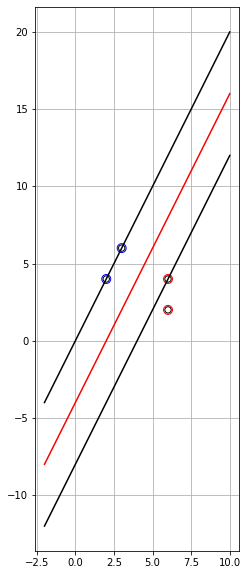

     pcost       dcost       gap    pres   dres
 0:  1.9345e-01  8.2455e-01  5e+00  1e+00  8e+00
 1:  7.8525e-01  1.5349e-01  6e-01  5e-16  5e-15
 2:  3.4766e-01  2.9190e-01  6e-02  5e-16  1e-15
 3:  3.1611e-01  3.1202e-01  4e-03  3e-16  6e-16
 4:  3.1265e-01  3.1250e-01  2e-04  4e-16  2e-14
 5:  3.1250e-01  3.1250e-01  2e-06  6e-16  1e-13
 6:  3.1250e-01  3.1250e-01  2e-08  2e-16  2e-13
Optimal solution found.
 predict data --> 
 [[3, 5, 1], [3, 4, 1], [4, 6, 1], [5, 4, -1], [5, 2, -1], [5, 6, -1]] 
 data end with 1 means postive -1 means negative


In [95]:
data= [[6.0,2.0,1],[6.0,4.0,1],[2.0,4.0,-1],[3.0,6.0,-1]]
svm_proc(data)
predic_data=[[3,5],[3,4],[4,6],[5,4],[5,2],[5,6]]
print(f' predict data --> \n {predict(data,predic_data)} \n data end with 1 means postive -1 means negative')

In [100]:
def calc_Q_p_G_h_2(data,C):
    Q = spmatrix([], [], [], (8,8))
    Q[0,0] = 2
    Q[1,1] = 2
    p= matrix([0.0,0.0,0.0,C,C,C,C,C],(8,1))
    G = []
    h = []
    for items in data:
        row = []
        if items[2] == 1:
            row.extend([-1 * item for item in items[:2]])
            row.append(-1)
            G.append(row)
            h.append(-1.0)
        else:
            row.extend(items[:2])
            row.append(1)
            G.append(row)
            h.append(-1.0)

    G = matrix(G).trans()

    G_r = spmatrix(-1.,range(5),range(5))
    G_d = spmatrix([],[],[],(5,3))

    G=(sparse([[G,G_d],[G_r,G_r]]))
    h_d =  spmatrix([],[],[],(5,1))
    h = sparse([matrix(h),h_d])
    h = matrix(h)
    

  
    return Q, p, G, h 

def svm_proc_non_separable(data,C):
    Q, p, G, h = calc_Q_p_G_h_2(data,C)
    print(f'Q is --> \n {Q} \n p is --> \n{p}\n G is --> \n{G} \n --> h is --> \n{h}')
    sol=solvers.qp(Q, p, G, h)
  
    w1 = sol['x'][0]
    w2 = sol['x'][1]
    b  = sol['x'][2]
    print(f'\n  w is -->{[w1,w2]} \n b is {b}')
    dot_product = np.dot([w1,w2],[w1,w2])
    x = [[item[0],item[1]] for item in data]
    w = [w1,w2]
    support_vectors = ['%.2f'%(np.dot(w,item)+b) for item in x]
    margin_size = 2 / (sqrt(dot_product))
    print(f'\n margin size is --> {margin_size}')
    print(f'\n ---------------------\n support vectors is --> {support_vectors} \n map with current data --> \n{data}')
    print('such that w.x+b = 1 or -1 \n -----------------------')
    plot(data, w1, w2, b, sol)

Q is --> 
 [ 2.00e+00     0         0         0         0         0         0     ... ]
[    0      2.00e+00     0         0         0         0         0     ... ]
[    0         0         0         0         0         0         0     ... ]
[    0         0         0         0         0         0         0     ... ]
[    0         0         0         0         0         0         0     ... ]
[    0         0         0         0         0         0         0     ... ]
[    0         0         0         0         0         0         0     ... ]
[    0         0         0         0         0         0         0     ... ]
 
 p is --> 
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 1.00e+00]
[ 1.00e+00]
[ 1.00e+00]
[ 1.00e+00]
[ 1.00e+00]

 G is --> 
[-3.00e+00 -5.00e+00 -1.00e+00 -1.00e+00     0         0         0     ... ]
[-5.00e+00 -3.00e+00 -1.00e+00     0     -1.00e+00     0         0     ... ]
[-6.00e+00 -6.00e+00 -1.00e+00     0         0     -1.00e+00     0     ... ]
[ 5.00e+00  6.00e+00 

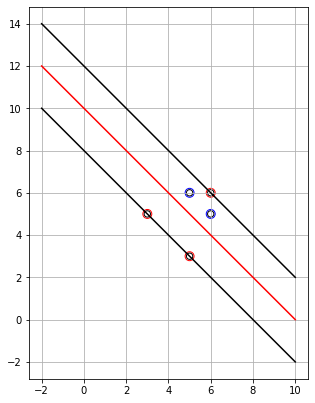

In [101]:
data = [[3.0,5.0,1],[5.0,3.0,1],[6.0,6.0,1],[5.0,6.0,-1],[6.0,5.0,-1]]
svm_proc_non_separable(data,1)

